In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## 구글 드라이브와 연동

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 구글 GPU 사용

In [4]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


## train_DS와 test_DS

In [5]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root="/content/drive/MyDrive/Colab Notebooks/data", train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root="/content/drive/MyDrive/Colab Notebooks/data", train=False, download=True, transform=transform)

In [6]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [7]:
train_DS.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [9]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [10]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

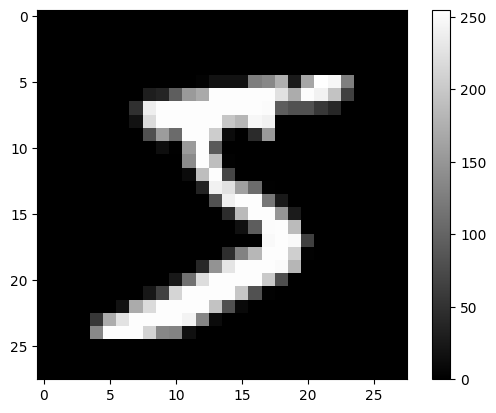

In [11]:
plt.imshow(train_DS.data[0], cmap='gray')
plt.colorbar()

In [12]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader 구경

In [13]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [14]:
train_DL.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()

<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
torch.uint8
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,

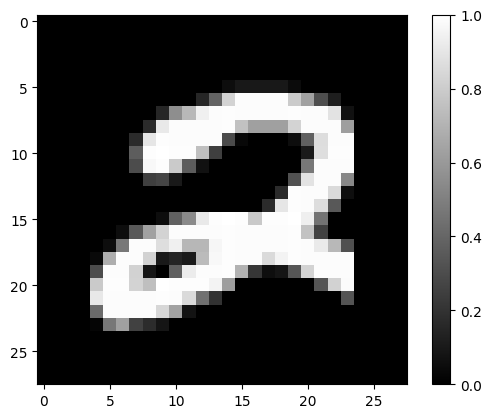

In [15]:
x_batch, y_batch = next(iter(train_DL))
# ToTensor의 역할
# 1. tensor로 바꾸고
# 2. 개채행열로 바꾸고
# 3. 0~1 사이로 바꾸고 (int -> float)
print(type(train_DS.data))
print(train_DS.data.shape)
print(train_DS.data.dtype)
print(train_DS.data[0])

print(type(x_batch))
print(x_batch.shape)
print(x_batch.dtype)
print(x_batch[0])

plt.imshow(x_batch[0].squeeze(), cmap='gray')
plt.colorbar()
print(y_batch[0])

## 본격적으로 model 만들기!

In [16]:
from torch import nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fcs = nn.Sequential(nn.Linear(28*28, 100),
                             nn.ReLU(),
                             nn.Linear(100,10))
  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.fcs(x)
    return x

In [17]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(flat_images.shape)
flat_images2 = torch.flatten(x_batch, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [18]:
model = MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


In [19]:
from torch import optim

LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

def Train(model, train_DL, criterion, optimizer, EPOCH):
  loss_history = []
  NoT=len(train_DL.dataset)

  model.train() # train mode로 전환
  for ep in range(EPOCH):
    rloss=0 # running loss
    for x_batch, y_batch in train_DL:
      x_batch = x_batch.to(DEVICE)
      y_batch = y_batch.to(DEVICE)
      # inference
      y_hat = model(x_batch)
      #loss
      loss = criterion(y_hat, y_batch)
      # update
      optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
      loss.backward() # backpropagation
      optimizer.step() # weight update
      # loss accumulation
      loss_b = loss.item() * x_batch.shape[0] # batch loss
      rloss += loss_b
  # print loss
    loss_e = rloss/NoT # epoch loss
    loss_history += [loss_e]
    print(f"Epoch: {ep+1}, train loss: {loss_e:.3f}")
    print("-"*20)

  return loss_history

## Cross Entropy 확인(왜 모델에 softmax를 안붙였을까?)

In [20]:
# cross entropy 구하는 여러가지 방법
import torch.nn.functional as F

y_hat = torch.randn(3, 5) # data는 세 개, 5 종류로 분류하는 문제 가정
print(y_hat) # 가로 축으로 합이 1이 아님, 즉, softmax 통과 전
y_batch = torch.randint(5, (3,))
print(y_batch)

# 방법 1
loss = F.cross_entropy(y_hat, y_batch)
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss()
print(criterion(y_hat, y_batch))

# 방법 3
soft = nn.Softmax(dim=1)
y_hat_soft = soft(y_hat)
print(y_hat_soft)
loss=0
for i, val in enumerate(y_hat_soft):
  print(i, val)
  loss += -torch.log(val[y_batch[i]])
print(loss/3) # 평균이 내장되어 있음

tensor([[-1.4712,  0.3670, -1.2509,  0.8779,  1.1579],
        [-0.4828, -1.6586, -0.8527, -0.4073,  0.7890],
        [ 0.8477,  0.4297,  1.0082,  0.1090, -1.3444]])
tensor([0, 3, 3])
tensor(2.4266)
tensor(2.4266)
tensor([[0.0304, 0.1912, 0.0379, 0.3187, 0.4217],
        [0.1505, 0.0464, 0.1040, 0.1623, 0.5368],
        [0.2922, 0.1924, 0.3431, 0.1396, 0.0326]])
0 tensor([0.0304, 0.1912, 0.0379, 0.3187, 0.4217])
1 tensor([0.1505, 0.0464, 0.1040, 0.1623, 0.5368])
2 tensor([0.2922, 0.1924, 0.3431, 0.1396, 0.0326])
tensor(2.4266)


Epoch: 1, train loss: 0.319
--------------------
Epoch: 2, train loss: 0.144
--------------------
Epoch: 3, train loss: 0.099
--------------------
Epoch: 4, train loss: 0.076
--------------------
Epoch: 5, train loss: 0.059
--------------------
[0.3185861741522948, 0.14428985484689474, 0.09865436024243633, 0.07576935665160417, 0.058978947652379675]


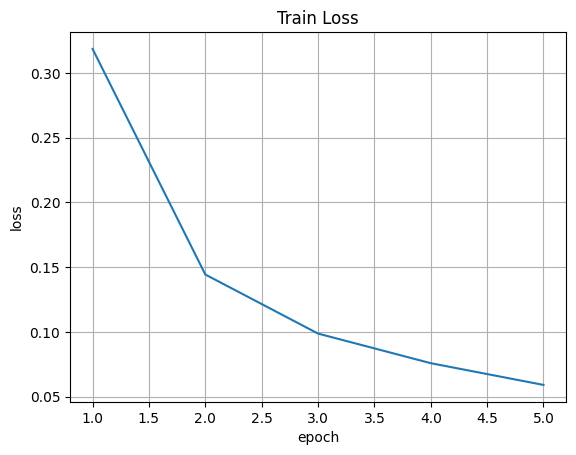

In [21]:
loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)
print(loss_history)
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Train Loss")
plt.grid()

## 모델 저장하기 & 불러오기

In [22]:
model.state_dict()

OrderedDict([('fcs.0.weight',
              tensor([[ 0.0061,  0.0113,  0.0195,  ...,  0.0115,  0.0179,  0.0239],
                      [ 0.0216, -0.0243, -0.0013,  ..., -0.0050,  0.0045,  0.0234],
                      [ 0.0274, -0.0119,  0.0245,  ...,  0.0088,  0.0051,  0.0081],
                      ...,
                      [-0.0069,  0.0327,  0.0218,  ..., -0.0254, -0.0126, -0.0150],
                      [ 0.0325, -0.0204,  0.0162,  ..., -0.0159,  0.0246, -0.0145],
                      [ 0.0343, -0.0190, -0.0253,  ..., -0.0239, -0.0131,  0.0137]],
                     device='cuda:0')),
             ('fcs.0.bias',
              tensor([ 0.1936, -0.0264, -0.0727, -0.0402,  0.0620,  0.0976, -0.1505,  0.0969,
                       0.2202,  0.0177,  0.0787,  0.2078,  0.1329, -0.0360,  0.0399,  0.0089,
                      -0.1364,  0.0347,  0.2690, -0.1111,  0.0923, -0.0027,  0.0909,  0.1822,
                      -0.0247, -0.0029, -0.0140,  0.1576, -0.0127,  0.0865,  0.0240,  0.

In [23]:
save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/MLP.pt"
torch.save(model.state_dict(), save_model_path)

In [24]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))
# map_location 있어야 GPU로 학습했던거 현재 DEVICE로 불러올 수 있음

<All keys matched successfully>

## 모델 테스트하기

In [32]:
def Test(model, test_DL):
  model.eval() # test mode로 전환
  with torch.no_grad():
    rcorrect = 0
    for x_batch, y_batch in test_DL:
      x_batch = x_batch.to(DEVICE)
      y_batch = y_batch.to(DEVICE)
      # inference
      y_hat = model(x_batch)
      # corrects accumulation
      pred = y_hat.argmax(dim=1)
      corrects_b = torch.sum(pred==y_batch).item() # torch.eq(pred, y_batch)
      rcorrect += corrects_b
    accuracy_e  =rcorrect/len(test_DL.dataset)*100
  print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({accuracy_e:.1f} %)")
  return round(accuracy_e,1)

In [33]:
Test(load_model, test_DL)

Test accuracy: 9770/10000 (97.7 %)


97.7

In [37]:
def Test_plot(model, test_DL):
  model.eval()
  with torch.no_grad():
    x_batch, y_batch = next(iter(test_DL))
    x_batch = x_batch.to(DEVICE)
    y_hat = model(x_batch)
    pred = y_hat.argmax(dim=1)

  x_batch = x_batch.to("cpu")
  plt.figure(figsize=(8,4))
  for idx in range(6):
    plt.subplot(2,3, idx+1, xticks=[], yticks=[])
    plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
    pred_class = test_DL.dataset.classes[pred[idx]]
    true_class = test_DL.dataset.classes[y_batch[idx]]
    plt.title(f"{pred_class} ({true_class})", color="g" if pred_class==False else "r")

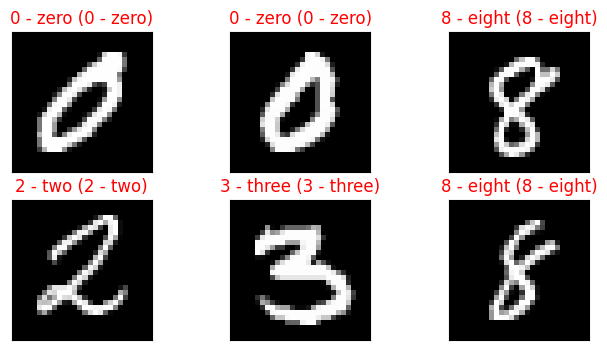

In [38]:
Test_plot(load_model, test_DL)

In [39]:
# 파라미터 수 구하기
def count_params(model):
  num = sum([p.numel() for p in model.parameters() if p.requires_grad])
  return num

In [40]:
print(count_params(load_model))

79510


In [42]:
def get_conf(model, test_DL):
  N = len(test_DL.dataset.classes)
  model.eval()
  with torch.no_grad():
    confusion = torch.zeros(N,N)
    for x_batch, y_batch in test_DL:
      x_batch = x_batch.to(DEVICE)
      y_batch = y_batch.to(DEVICE)
      # inference
      y_hat = model(x_batch)
      # accuracy
      pred = y_hat.argmax(dim=1)
      confusion += torch.bincount(N * y_batch.cpu() + pred.cpu(), minlength=N**2).reshape(N,N)
      # confusion matrix는 무조건 10*10이 되어야 하는데 만약 마지막 label에 대해 예측을 모두 실패하면 100개보다

  confusion = confusion.numpy()
  return confusion

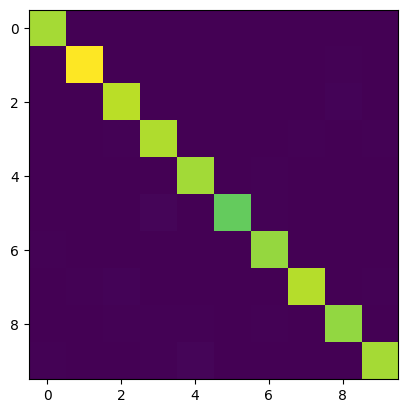

In [43]:
confusion = get_conf(load_model, test_DL)
plt.imshow(confusion)

In [44]:
import numpy as np

def plot_confusion_matrix(confusion, classes=None):
  N = confusion.shape[0]
  accuracy=np.trace(confusion)/np.sum(confusion)*100

  # confusion = confusion/np.sum(confusion, axis=1)
  plt.figure(figsize=(10,7))
  plt.imshow(confusion, cmap="Blues")
  plt.title("confusion matrix")
  plt.colorbar()

  for i in range(N):
    for j in range(N):
      plt.text(j,i, round(confusion[i,j]),
               horizontalalignment="center", fontsize=10,
               color="white" if confusion[i,j] > np.max(confusion) / 1.5 else "black")

  if classes is not None:
    plt.xticks(range(N), classes)
    plt.yticks(range(N), classes)
  else:
    plt.xticks(range(N))
    plt.yticks(range(N))

  plt.xlabel(f"Predicted label \n accuracy ={accuracy:.1f} %")
  plt.ylabel("True label")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0 - zero'),
  Text(1, 0, '1 - one'),
  Text(2, 0, '2 - two'),
  Text(3, 0, '3 - three'),
  Text(4, 0, '4 - four'),
  Text(5, 0, '5 - five'),
  Text(6, 0, '6 - six'),
  Text(7, 0, '7 - seven'),
  Text(8, 0, '8 - eight'),
  Text(9, 0, '9 - nine')])

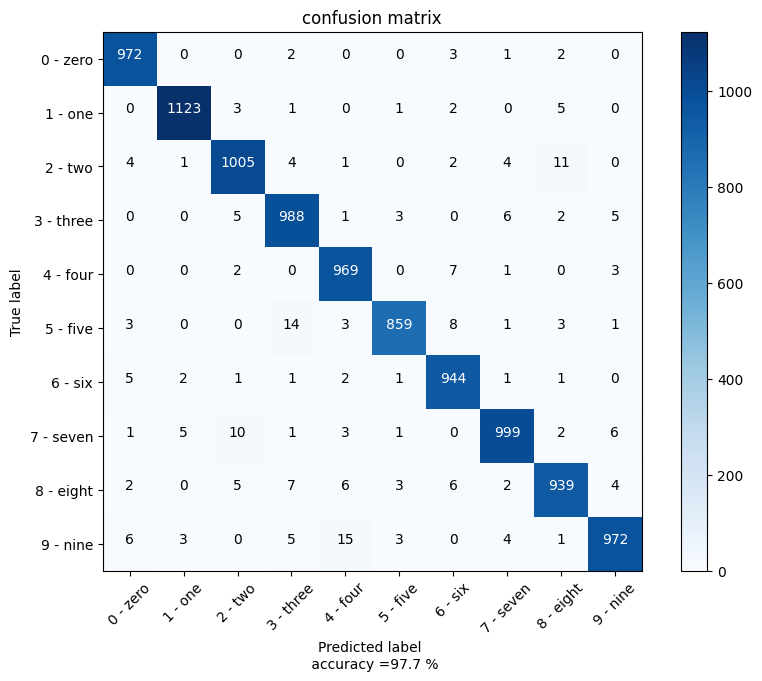

In [46]:
confusion = get_conf(load_model, test_DL)
plot_confusion_matrix(confusion, test_DL.dataset.classes)
plt.xticks(rotation=45)